<h1 id="header" align="center">
    Indian Traffic Violation Dataset - Exploratory Data Analysis
</h1>

---
## Введение

__EDA(Exploratory Data Analysis)__ — разведочный анализ данных, проводимый с целью изучения структуры и свойств данных, выявления в них закономерностей и аномалий, обработки и визуализации.
В EDA используются метрики, которые помогают оценить характеристики набора данных:

![Скриншот с метриками](images/metrics.jpg)

Для данного учебного проекта необходимо следовать, как минимум, __первым двум метрикам__.

### Датасет
    
Обрабатывается набор данных о нарушениях правил дорожного движения в разных штатах Индии за 2023 и 2024 год.

У выбранного датасета 33 признака.

Ссылка на веб-источник: https://www.kaggle.com/datasets/khushikyad001/indian-traffic-violation/data

Ссылка на сохранённый датасет: https://drive.google.com/file/d/1gJrXyvqIVSZCEjqhGhvisyMyxI0zBald/view?usp=drive_link

### Цель разведочного анализа данных

Целью данного EDA является __снижение аварийности и повышение безопасности вождения.__


---
## Этапы EDA

### Загрузка и сохранение данных, импорт необходимых для анализа библиотек

Работа с датасетом подразумевает создание переменного окружения и установку Conda+Poetry. Подробнее об этом написано в [README.md](../README.md)
Для данного этапа работы были добавлены: numpy, seaborn, openpyxl.

Импортируем первичные библиотеки и загрузим данные:

In [20]:
import os
import requests
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

FILE_ID = "1gJrXyvqIVSZCEjqhGhvisyMyxI0zBald"  # ID файла на Google Drive
FILENAME = "dataset.csv"
DATA_DIR = Path("data")

DATA_DIR.mkdir(parents=True, exist_ok=True)
file_path = DATA_DIR / FILENAME

# Проверяем существует ли файл
if file_path.exists():
    dataset = pd.read_csv(file_path, sep=";")
    print(f"{'-'*40}")
    print(f"Датасет загружен: {len(dataset)} строк, {len(dataset.columns)} колонок")
    print(f"{'-'*40}")
else:
    file_url = f"https://drive.google.com/uc?id={FILE_ID}"
    response = requests.get(file_url)
    with open(file_path, "wb") as f:
        f.write(response.content)
    # Загружаем данные
    dataset = pd.read_csv(file_path, sep=";")
    print(f"{'-'*40}")
    print(f"Датасет загружен: {len(dataset)} строк, {len(dataset.columns)} колонок")
    print(f"{'-'*40}")

----------------------------------------
Датасет загружен: 4000 строк, 33 колонок
----------------------------------------


### Первичный просмотр данных

Выведем первые и последние 10 значений датасета, определим количество признаков и их типы данных.

In [21]:
dataset.head(10)

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,01.01.2023,23:02,Car,Red,2012,West Bengal,...,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,02.01.2023,0:42,Scooter,Silver,2010,Tamil Nadu,...,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,03.01.2023,4:32,Scooter,Grey,2006,Tamil Nadu,...,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,04.01.2023,15:06,Car,Green,1996,Uttar Pradesh,...,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,05.01.2023,6:57,Truck,Yellow,2016,Delhi,...,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN
5,VLT100005,Over-speeding,4636,Maharashtra,06.01.2023,16:36,Bus,White,2013,Gujarat,...,100,87,0.17,Negative,Yes,No,Card,No,3,Fine Paid On Spot
6,VLT100006,Wrong Parking,2793,West Bengal,07.01.2023,2:03,Scooter,Silver,2018,Delhi,...,30,24,0.50,Not Conducted,Yes,Yes,Cash,Yes,1,NaN
7,VLT100007,Over-speeding,3965,Delhi,08.01.2023,16:23,Truck,Yellow,2009,Punjab,...,60,119,0.19,Positive,No,No,Not Paid,No,2,Fine Paid On Spot
8,VLT100008,No Seatbelt,4497,Uttar Pradesh,09.01.2023,18:09,Bus,Green,2021,Maharashtra,...,80,36,0.28,Negative,No,No,Cash,No,4,First Violation
9,VLT100009,Using Mobile Phone,374,West Bengal,10.01.2023,17:01,Car,Red,1997,Uttar Pradesh,...,30,114,0.48,Not Conducted,Yes,Yes,Not Paid,No,2,Repeat Offender


In [22]:
dataset.tail(10)

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
3990,VLT103990,No Helmet,4247,Karnataka,04.12.2033,13:12,Bike,Green,2023,Uttar Pradesh,...,60,91,0.18,Not Conducted,Yes,No,Card,Yes,1,Repeat Offender
3991,VLT103991,Overloading,467,Tamil Nadu,05.12.2033,3:30,Truck,Yellow,2019,Tamil Nadu,...,50,108,0.27,Negative,No,Yes,Not Paid,No,4,First Violation
3992,VLT103992,Using Mobile Phone,902,West Bengal,06.12.2033,7:05,Scooter,Blue,1998,Punjab,...,60,119,0.09,Not Conducted,Yes,Yes,Not Paid,Yes,5,Repeat Offender
3993,VLT103993,Driving Without License,1138,West Bengal,07.12.2033,2:58,Bus,White,2006,Gujarat,...,80,69,0.18,Negative,No,No,Not Paid,Yes,3,First Violation
3994,VLT103994,Over-speeding,1863,West Bengal,08.12.2033,7:47,Bus,Silver,1996,Gujarat,...,80,115,0.06,Positive,No,No,Cash,Yes,1,NaN
3995,VLT103995,Signal Jumping,2180,Maharashtra,09.12.2033,4:18,Car,White,2000,Gujarat,...,100,90,0.15,Positive,Yes,No,Not Paid,Yes,2,NaN
3996,VLT103996,Using Mobile Phone,2708,Karnataka,10.12.2033,8:21,Scooter,Black,2018,Delhi,...,100,90,0.21,Negative,Yes,No,Card,No,4,First Violation
3997,VLT103997,Signal Jumping,3163,Delhi,11.12.2033,9:36,Bike,Yellow,1996,West Bengal,...,60,54,0.28,Negative,Yes,No,Online,No,2,First Violation
3998,VLT103998,No Seatbelt,1691,Gujarat,12.12.2033,2:46,Car,Black,1995,Delhi,...,30,77,0.28,Positive,No,Yes,Cash,No,2,NaN
3999,VLT103999,No Helmet,2133,Delhi,13.12.2033,9:14,Truck,Red,2010,Delhi,...,50,105,0.34,Not Conducted,No,No,Card,Yes,4,NaN


In [23]:
dataset.shape

(4000, 33)

In [24]:
dataset.dtypes

Violation_ID                  object
Violation_Type                object
Fine_Amount                    int64
Location                      object
Date                          object
Time                          object
Vehicle_Type                  object
Vehicle_Color                 object
Vehicle_Model_Year             int64
Registration_State            object
Driver_Age                     int64
Driver_Gender                 object
License_Type                  object
Penalty_Points                 int64
Weather_Condition             object
Road_Condition                object
Officer_ID                    object
Issuing_Agency                object
License_Validity              object
Number_of_Passengers           int64
Helmet_Worn                   object
Seatbelt_Worn                 object
Traffic_Light_Status          object
Speed_Limit                    int64
Recorded_Speed                 int64
Alcohol_Level                float64
Breathalyzer_Result           object
T

### Обработка данных

#### Просмотр нулевых значений

Определим наличие пропущенных значений, перед тем как подвергать данные анализу.
Визуально отобразим пропуски:

Text(0, 0.5, 'Sample Number')

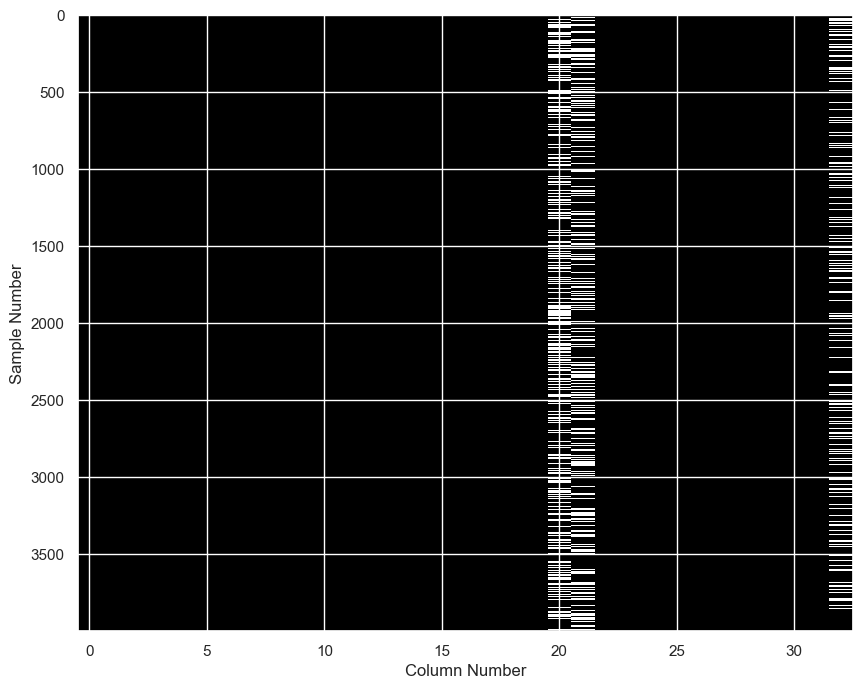

In [25]:
plt.figure(figsize=(10, 8))
plt.imshow(dataset.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

Выведем информацию о признаках, в которых присутствуют пустые значения:

In [26]:
for column in dataset.columns:
    missing_count = dataset[column].isna().sum()
    
    if missing_count > 0:
        print(f"\n Колонка: {column}")
        print(f"   Тип: {dataset[column].dtype}")
        print(f"   Значения: {list(dataset[column].unique())}")
        value_counts = dataset[column].value_counts(dropna=False)
        for value, count in value_counts.items():
            print(f"   '{value}': {count}")


 Колонка: Helmet_Worn
   Тип: object
   Значения: [nan, 'Yes', 'No']
   'nan': 1349
   'Yes': 1326
   'No': 1325

 Колонка: Seatbelt_Worn
   Тип: object
   Значения: ['Yes', 'No', nan]
   'No': 1385
   'Yes': 1323
   'nan': 1292

 Колонка: Comments
   Тип: object
   Значения: ['Repeat Offender', nan, 'Fine Paid On Spot', 'First Violation']
   'Fine Paid On Spot': 1026
   'First Violation': 1007
   'nan': 996
   'Repeat Offender': 971


Признак Comments содержит различную информацию: об оплате штрафа и повторяемости нарушений. В связи низкой заполняемостью, несвязностью информации и её малой практической важностью, данный признак будет исключен.

In [ ]:
dataset=dataset.drop("Comments", axis=1)

В датасете присутствует признак Vehicle_Type, определяющий тип транспортного средства:

In [ ]:
print("\nКолонка: Vehicle_Type")
print(f"    Значения: {list(dataset['Vehicle_Type'].unique())}")


Колонка: Vehicle_Type
    Значения: ['Car', 'Scooter', 'Truck', 'Bus', 'Auto Rickshaw', 'Bike']


Видно, что некоторые транспортные средства не предусматривают наличие шлема или ремня безопасности. Для сохранении логики, создадим понятные категории для Helmet_Worn и Seatbelt_Worn. Заменим категории NaN на "not_required".

In [ ]:
# Создаем понятные категории для Helmet_Worn
helmet_mapping = {
        "Yes": "worn",  # надет
        "No": "not_worn",  # не надет
        np.nan: "not_required",  # не предусмотрен
    }
dataset["Helmet_Worn"] = (
        dataset["Helmet_Worn"].map(helmet_mapping))
    # Создаем понятные категории для Seatbelt_Worn
seatbelt_mapping = {
        "Yes": "worn",  # надет
        "No": "not_worn",  # не надет
        np.nan: "not_required",  # не предусмотрен
    }
dataset["Seatbelt_Worn"] = (
        dataset["Seatbelt_Worn"].map(seatbelt_mapping))

print("\nКолонка: Helmet_Worn")
print(f"    Значения: {list(dataset['Helmet_Worn'].unique())}")

print("\nКолонка: Seatbelt_Worn")
print(f"    Значения: {list(dataset['Seatbelt_Worn'].unique())}")


Колонка: Helmet_Worn
    Значения: ['not_required', 'worn', 'not_worn']

Колонка: Seatbelt_Worn
    Значения: ['worn', 'not_worn', 'not_required']


#### Коррелирующие признаки

В датасете присутствуют два коррелирующих признака: Alcohol_Level и Breathalyzer_Result. Alcohol_Level показывает количество алкоголя в крови, а Breathalyzer_Result - результат теста (обнаружено, не обнаружено, не проводился).

Проверим соответствуют ли эти два признака друг другу. При проведении теста в Alcohol_Level должно присутствовать значение, если тест не проводился значение должно быть 0 или NaN.


Колонка: Alcohol_Level
    Максимальное значение: 0.5
    Минимальное значение: 0.0

Таблица соответствия признаков:
Alcohol_Level         0  ≤0.03  0.031-0.05  0.051-0.08  0.081-0.5   All
Breathalyzer_Result                                                    
Negative              9     93          53          70       1115  1340
Not Conducted        22     60          44          83       1137  1346
Positive              9     77          44          88       1096  1314
All                  40    230         141         241       3348  4000




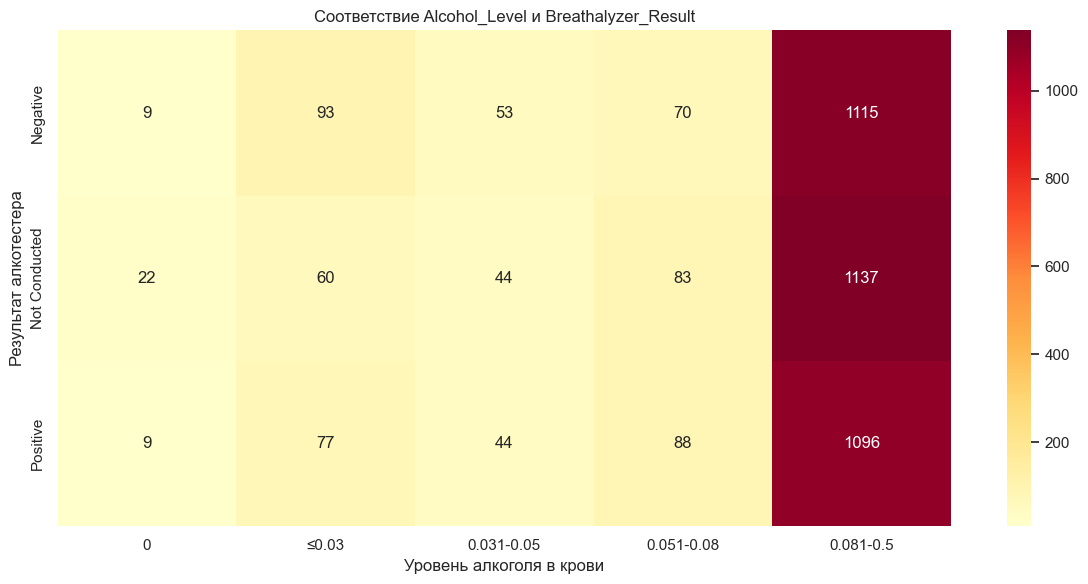

In [ ]:
legal_limit = 0.03 #Максимальное допустимое значение уровня алкоголя в крови в Индии

print("\nКолонка: Alcohol_Level")
print(f"    Максимальное значение: {dataset['Alcohol_Level'].max()}")
print(f"    Минимальное значение: {dataset['Alcohol_Level'].min()}")

table = pd.crosstab(
    dataset['Breathalyzer_Result'], 
    pd.cut(dataset['Alcohol_Level'],
           bins=[-1, 0, 0.03, 0.05, 0.08, 0.5, 1],
           labels=[
               '0', 
               '≤0.03', 
               '0.031-0.05',
               '0.051-0.08', 
               '0.081-0.5',
               '>0.5'
           ]),
    margins=True
)

print("\nТаблица соответствия признаков:")
print(table)
print("\n")

# Визуализация: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(table.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd')
plt.title('Соответствие Alcohol_Level и Breathalyzer_Result')
plt.xlabel('Уровень алкоголя в крови')
plt.ylabel('Результат алкотестера')
plt.tight_layout()
plt.show()

Из таблицы видно, что в датасете присутствует критическое несоответствие: тест не проводился, но его результаты в таблице присутствуют. 
Также мы видим, что при значениях ниже 0.03 (максимальное допустимое значение уровня алкоголя в крови в Индии), тест показал положительный результат, что недопустимо!

Анализ погрешности алкотестера:

In [ ]:
false_test = table.loc['Positive', ['0', '≤0.03']].sum()
legal_level = table[['0', '≤0.03']].sum().sum()

print(f"Количество тестов при уровне ≤0.03: {legal_level}")
print(f"Количество ложных результатов (Positive при ≤0.03): {false_test}")
print(f"Уровень ложных срабатываний (погрешность): {(false_test/legal_level)*100:.2f}%")

Количество тестов при уровне ≤0.03: 540
Количество ложных результатов (Positive при ≤0.03): 86
Уровень ложных срабатываний (погрешность): 15.93%


Одна из возможных причин ошибки - синтетическое происхождение датасета, то есть данные были сгенерированы.
Убедимся или опровергнем эту теорию при дальнейшем анализе.

Для обработки данных в соответствии с целью EDA предлагается удалить признак Alcohol_Level и принимать во внимание значения Breathalyzer_Result, который показывает сам факт нарушения (превышения уровня алкоголя в крови).

In [ ]:
dataset = dataset.drop("Alcohol_Level", axis=1)

#### Объединение признаков

Для удобства работы с данными предлагается объединить признаки.
Признак Recorded_Speed показывает скорость движения транспортного средства. Признак Speed_Limit показывает максимальную разрешенную скорость на участке дороги. Сравним значения признаков, и создадим новый, показывающий факт превышения скорости.

In [ ]:
RS = dataset["Recorded_Speed"]
SL = dataset["Speed_Limit"]
dataset["Speed_Exceeded"] = RS > SL
dataset = dataset.drop(["Speed_Limit", "Recorded_Speed"], axis=1)

print("\nКолонка: Speed_Exceeded")
print(f"   Тип: {dataset['Speed_Exceeded'].dtype}")
print(f"   Значения: {list(dataset['Speed_Exceeded'].unique())}")


Колонка: Speed_Exceeded
   Тип: bool
   Значения: [np.False_, np.True_]


Для оптимизации памяти объединим признаки Date и Time в общий признак DateTime.

In [ ]:
dataset["DateTime"] = pd.to_datetime(
        dataset["Date"] + " " + dataset["Time"], format="%d.%m.%Y %H:%M"
    )
dataset = dataset.drop(["Date", "Time"], axis=1)

### Приведение типов

#### Просмотр нечисловых признаков

Проверим все нечисловые признаки датасета, чтобы в дальнейшем верно определить тип приведения

In [ ]:
dataset.select_dtypes(exclude="number").head()

,Violation_ID,Violation_Type,Location,Vehicle_Type,Vehicle_Color,Registration_State,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Speed_Exceeded,DateTime
0,VLT100000,Overloading,Karnataka,Car,Red,West Bengal,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,not_required,worn,Green,Negative,Yes,No,Online,Yes,False,2023-01-01 23:02:00
1,VLT100001,Driving Without License,Punjab,Scooter,Silver,Tamil Nadu,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,not_required,not_worn,Green,Negative,Yes,Yes,Online,No,True,2023-01-02 00:42:00
2,VLT100002,Using Mobile Phone,Maharashtra,Scooter,Grey,Tamil Nadu,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,worn,worn,Yellow,Not Conducted,No,No,Not Paid,Yes,False,2023-01-03 04:32:00
3,VLT100003,No Seatbelt,Uttar Pradesh,Car,Green,Uttar Pradesh,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,not_worn,not_worn,Green,Not Conducted,No,Yes,Online,No,True,2023-01-04 15:06:00
4,VLT100004,Over-speeding,Karnataka,Truck,Yellow,Delhi,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,not_required,not_worn,Red,Positive,No,Yes,Cash,Yes,True,2023-01-05 06:57:00


Как мы видим, признаки Driver_Gender, Towed, Fine_Paid и Court_Appearance_Required могли бы быть преобразованы в логический тип bool. Посмотрим какие уникальные значения содержатся в этих признаках.

In [ ]:
print(f"\n Колонка: {'Driver_Gender'}")
print(f"   Тип: {dataset['Driver_Gender'].dtype}")
print(f"   Значения: {list(dataset['Driver_Gender'].unique())}")

print(f"\n Колонка: {'Towed'}")
print(f"   Тип: {dataset['Towed'].dtype}")
print(f"   Значения: {list(dataset['Towed'].unique())}")

print(f"\n Колонка: {'Fine_Paid'}")
print(f"   Тип: {dataset['Fine_Paid'].dtype}")
print(f"   Значения: {list(dataset['Fine_Paid'].unique())}")

print(f"\n Колонка: {'Court_Appearance_Required'}")
print(f"   Тип: {dataset['Court_Appearance_Required'].dtype}")
print(f"   Значения: {list(dataset['Court_Appearance_Required'].unique())}")


 Колонка: Driver_Gender
   Тип: object
   Значения: ['Male', 'Female', 'Other']

 Колонка: Towed
   Тип: object
   Значения: ['Yes', 'No']

 Колонка: Fine_Paid
   Тип: object
   Значения: ['No', 'Yes']

 Колонка: Court_Appearance_Required
   Тип: object
   Значения: ['Yes', 'No']


К сожалению, Driver_Gender не может быть приведён к числовому типу, но является важным для анализа датасета. Преобразуем остальные признаки в логический тип:

In [ ]:
dataset["Towed"] = dataset["Towed"].map({"Yes": True, "No": False})
dataset["Towed"] = dataset["Towed"].astype(bool)

dataset["Fine_Paid"] = (
        dataset["Fine_Paid"].map({"Yes": True, "No": False}).astype(bool)
    )

dataset["Court_Appearance_Required"] = (
        dataset["Court_Appearance_Required"]
        .map({"Yes": True, "No": False})
        .astype(bool)
    )

Проверим __уникальность записей__, это можно сделать по признаку Violation_ID.

In [ ]:
duplic_rows = dataset[dataset.duplicated()]
duplic_rows.shape

(0, 29)

Как видно, записи в строках полностью уникальны.

Осуществим преобразование типов текстовых данных.

In [ ]:
category_columns = [
        "Violation_Type",
        "Location",
        "Vehicle_Type",
        "Vehicle_Color",
        "Registration_State",
        "Driver_Gender",
        "License_Type",
        "Weather_Condition",
        "Road_Condition",
        "Issuing_Agency",
        "License_Validity",
        "Traffic_Light_Status",
        "Breathalyzer_Result",
        "Payment_Method",
    ]
for col in category_columns:
        dataset[col] = dataset[col].astype("category")

Таким образом, данные __нечисловых__ признаков имеют следующие типы:

In [ ]:
for col in dataset.select_dtypes(exclude="number").columns:
    print(f"  {col} - {dataset[col].dtype}")

  Violation_ID - object
  Violation_Type - category
  Location - category
  Vehicle_Type - category
  Vehicle_Color - category
  Registration_State - category
  Driver_Gender - category
  License_Type - category
  Weather_Condition - category
  Road_Condition - category
  Officer_ID - object
  Issuing_Agency - category
  License_Validity - category
  Helmet_Worn - object
  Seatbelt_Worn - object
  Traffic_Light_Status - category
  Breathalyzer_Result - category
  Towed - bool
  Fine_Paid - bool
  Payment_Method - category
  Court_Appearance_Required - bool
  Speed_Exceeded - bool
  DateTime - datetime64[ns]


#### Просмотр числовых признаков. Проверка наличия выбросов

Определим числовые признаки датасета.

In [ ]:
dataset.select_dtypes(include="number").head()

,Fine_Amount,Vehicle_Model_Year,Driver_Age,Penalty_Points,Number_of_Passengers,Previous_Violations
0,4544,2012,25,5,4,3
1,2776,2010,32,4,4,2
2,4785,2006,67,8,5,4
3,1138,1996,46,3,2,5
4,1610,2016,63,4,4,0


Найдем количество уникальных значений в каждом из признаков для точного выбора типа приведения.


 Колонка: Fine_Amount
   Тип: int64
   Уникальных значений: 2747

 Колонка: Vehicle_Model_Year
   Тип: int64
   Уникальных значений: 29

 Колонка: Driver_Age
   Тип: int64
   Уникальных значений: 58

 Колонка: Penalty_Points
   Тип: int64
   Уникальных значений: 11

 Колонка: Number_of_Passengers
   Тип: int64
   Уникальных значений: 5

 Колонка: Previous_Violations
   Тип: int64
   Уникальных значений: 6


<Axes: title={'center': 'Unique values per feature'}>

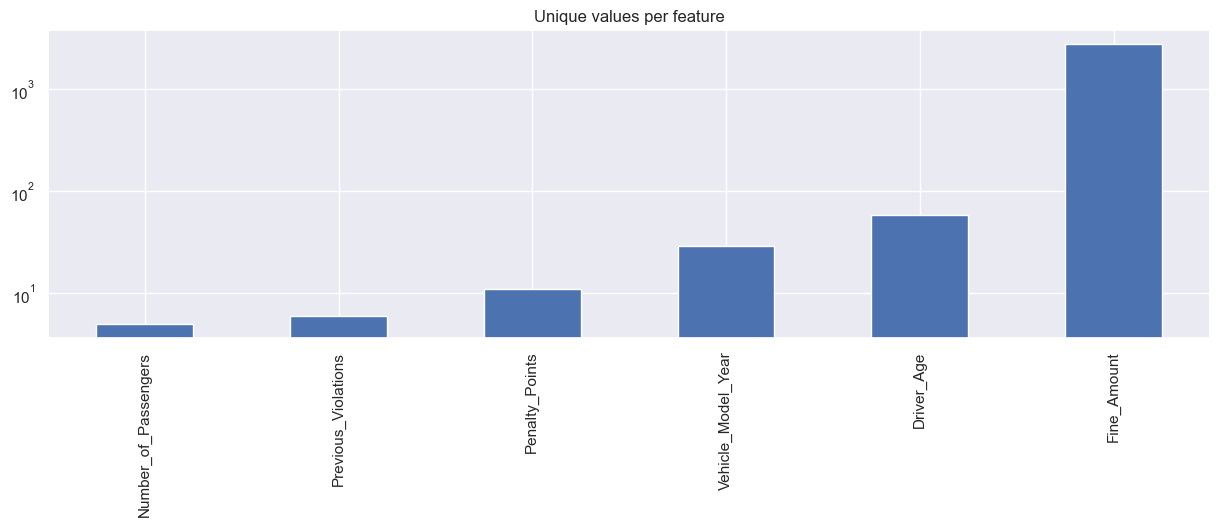

In [ ]:
for column in dataset.select_dtypes(include="number").columns:
    print(f"\n Колонка: {column}")
    print(f"   Тип: {dataset[column].dtype}")
    print(f"   Уникальных значений: {dataset[column].nunique()}")

unique_val = dataset.select_dtypes(include="number").nunique().sort_values()
unique_val.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

Определим наличие выбросов в каждом из признаков.

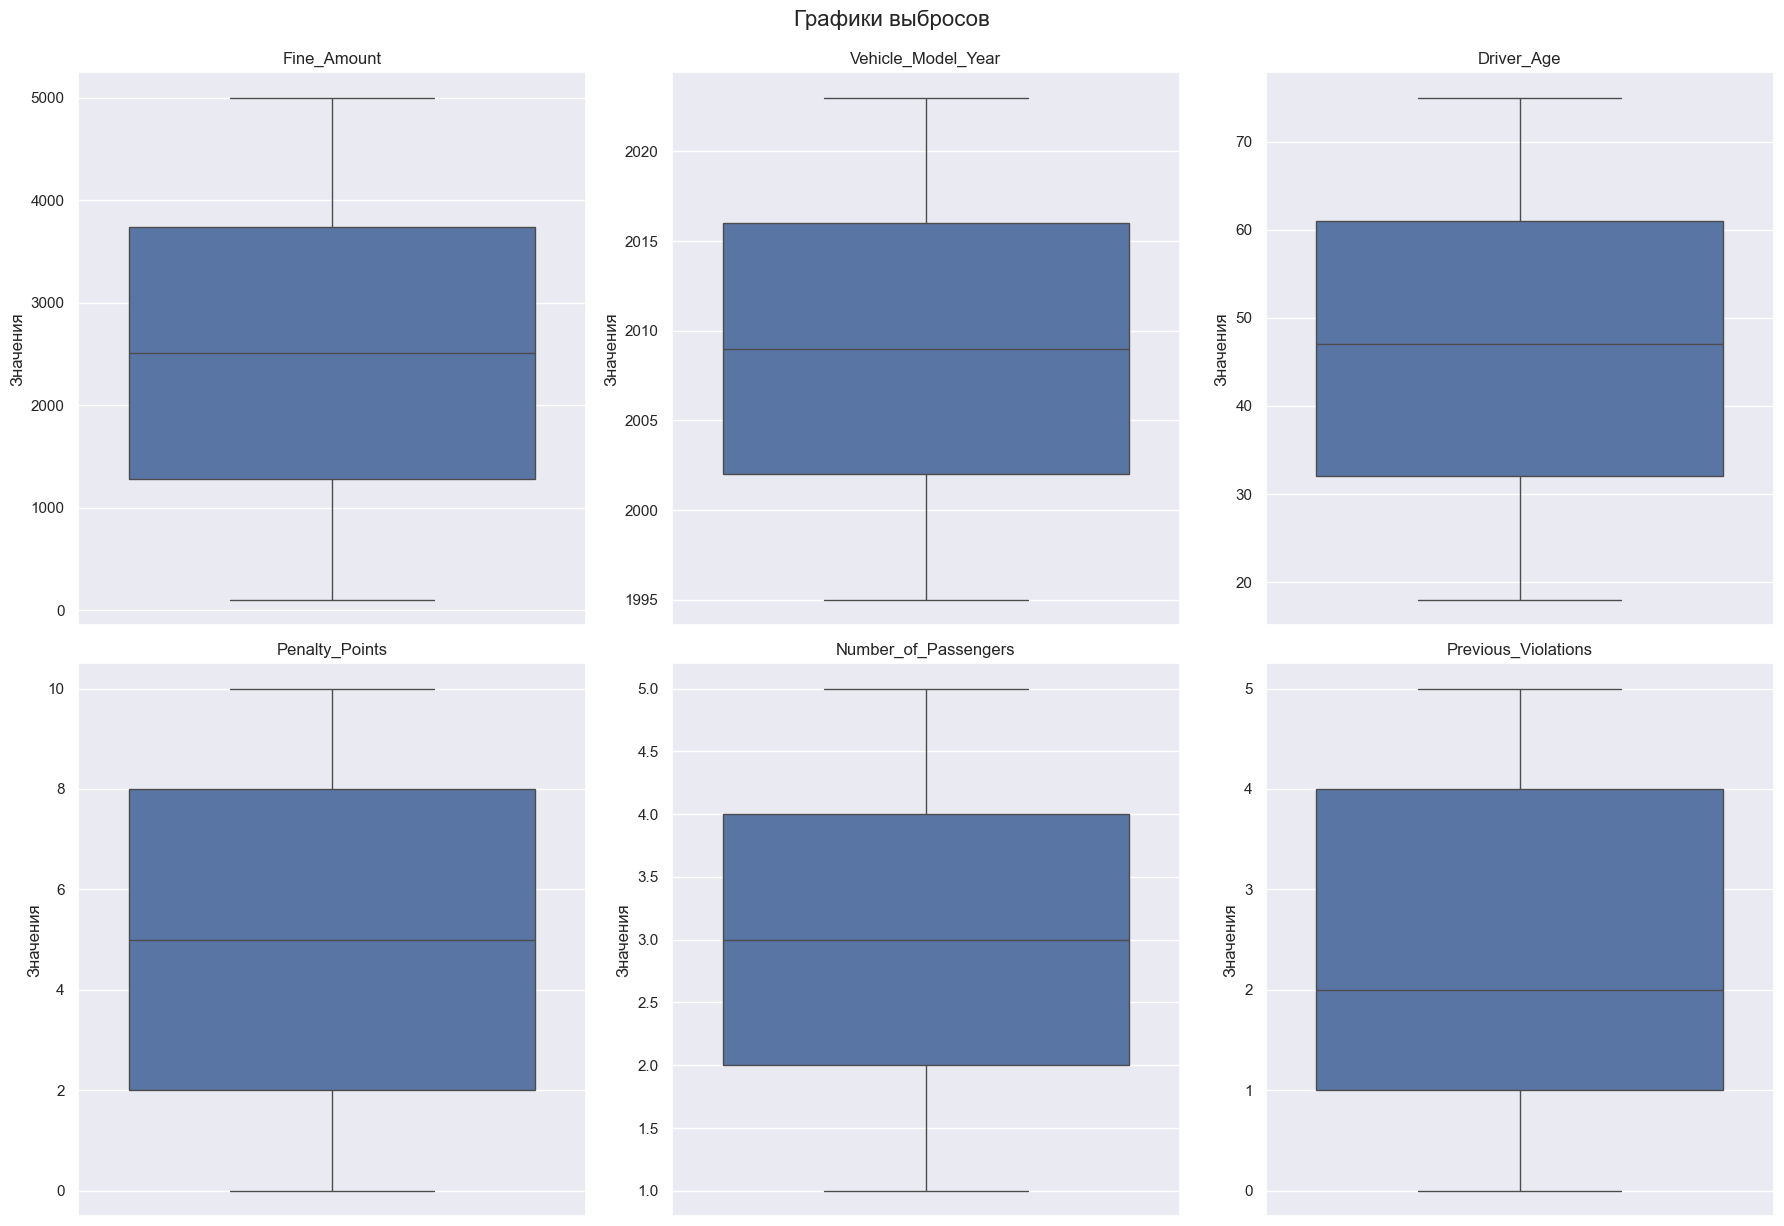

In [ ]:
selected_columns = ['Fine_Amount', 'Vehicle_Model_Year', 'Driver_Age', 'Penalty_Points', 'Number_of_Passengers', 'Previous_Violations']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    sns.boxplot(y=dataset[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Значения')

plt.tight_layout()
plt.suptitle('Графики выбросов', y=1.02, fontsize=16)
plt.show()

Из графиков видно, что выбросы в числовых признаках отсутствуют. Осуществим приведение типов данных.

In [ ]:
numeric_conversions = {
        "Fine_Amount": "int16",
        "Vehicle_Model_Year": "int16",
        "Driver_Age": "uint8",
        "Penalty_Points": "uint8",
        "Number_of_Passengers": "uint8",
        "Previous_Violations": "uint8",
    }
for col, dtype in numeric_conversions.items():
        dataset[col] = dataset[col].astype(dtype)

Таким образом, данные __числовых__ признаков имеют следующие типы:

In [ ]:
for col in dataset.select_dtypes(include="number").columns:
    print(f"  {col} - {dataset[col].dtype}")

  Fine_Amount - int16
  Vehicle_Model_Year - int16
  Driver_Age - uint8
  Penalty_Points - uint8
  Number_of_Passengers - uint8
  Previous_Violations - uint8



### Сохранение данных в формате .parquet

Для удобства использования обработанных данных отличным решением будет сохранить данные в формате .parquet.

In [ ]:
parquet_path = os.path.join(file_path.parent, "dataset.parquet")
dataset.to_parquet(parquet_path, index=False)
dataset_parq = pd.read_parquet(parquet_path)
dataset_parq.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,Driver_Age,Driver_Gender,License_Type,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Number_of_Passengers,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Speed_Exceeded,DateTime
0,VLT100000,Overloading,4544,Karnataka,Car,Red,2012,West Bengal,25,Male,Commercial,5,Cloudy,Slippery,OFF9971,Local Police,Valid,4,not_required,worn,Green,Negative,True,False,Online,True,3,False,2023-01-01 23:02:00
1,VLT100001,Driving Without License,2776,Punjab,Scooter,Silver,2010,Tamil Nadu,32,Female,Commercial,4,Rainy,Dry,OFF6000,Highway Patrol,Valid,4,not_required,not_worn,Green,Negative,True,True,Online,False,2,True,2023-01-02 00:42:00
2,VLT100002,Using Mobile Phone,4785,Maharashtra,Scooter,Grey,2006,Tamil Nadu,67,Female,Two-Wheeler,8,Clear,Potholes,OFF5706,Local Police,Valid,5,worn,worn,Yellow,Not Conducted,False,False,Not Paid,True,4,False,2023-01-03 04:32:00
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,Car,Green,1996,Uttar Pradesh,46,Male,Learner,3,Rainy,Wet,OFF5575,Highway Patrol,Valid,2,not_worn,not_worn,Green,Not Conducted,False,True,Online,False,5,True,2023-01-04 15:06:00
4,VLT100004,Over-speeding,1610,Karnataka,Truck,Yellow,2016,Delhi,63,Female,Four-Wheeler,4,Foggy,Potholes,OFF7147,Traffic Police,Valid,4,not_required,not_worn,Red,Positive,False,True,Cash,True,0,True,2023-01-05 06:57:00


### Проверка по метрикам

Качество данных в датасете определяется их соответствием метрикам. Для нашего датасета установим, что должно выполняться соответствие двум метрикам: Completeness(полнота данных) и Uniqueness(уникальность данных).

Для проверки полноты данных значение непустых ячеек в признаке должно совпадать с количеством ячеек.

In [ ]:
print(f"\n          Completeness")
compl = dataset_parq.count() / len(dataset_parq)
uniq = dataset_parq["Violation_ID"].nunique() / len(
    dataset_parq["Violation_ID"]
)
print(compl)

print(f"\n          Uniqueness")
print(f"Violation_ID = {uniq}")


          Completeness
Violation_ID                 1.0
Violation_Type               1.0
Fine_Amount                  1.0
Location                     1.0
Vehicle_Type                 1.0
Vehicle_Color                1.0
Vehicle_Model_Year           1.0
Registration_State           1.0
Driver_Age                   1.0
Driver_Gender                1.0
License_Type                 1.0
Penalty_Points               1.0
Weather_Condition            1.0
Road_Condition               1.0
Officer_ID                   1.0
Issuing_Agency               1.0
License_Validity             1.0
Number_of_Passengers         1.0
Helmet_Worn                  1.0
Seatbelt_Worn                1.0
Traffic_Light_Status         1.0
Breathalyzer_Result          1.0
Towed                        1.0
Fine_Paid                    1.0
Payment_Method               1.0
Court_Appearance_Required    1.0
Previous_Violations          1.0
Speed_Exceeded               1.0
DateTime                     1.0
dtype: float64

   

---

### Анализ данных

Целью данного EDA является __снижение аварийности и повышение безопасности вождения.__ Проведем анализ по следующим признакам:

1) Распределение нарушений по типам

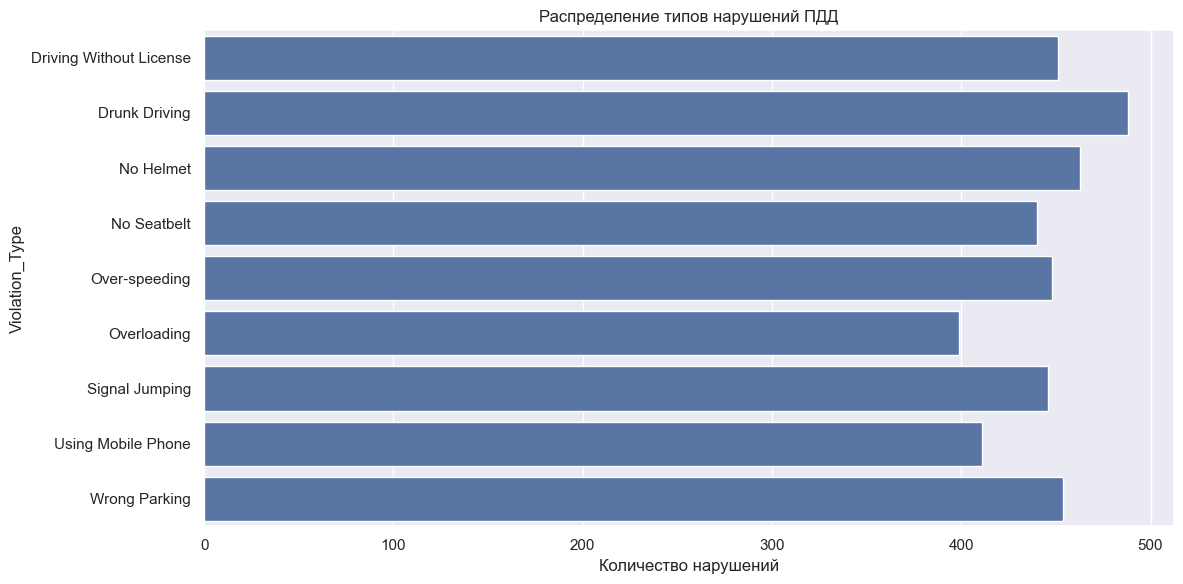

Вывод: Самые частые нарушения - ['Drunk Driving', 'No Helmet', 'Wrong Parking', 'Driving Without License', 'Over-speeding']


In [ ]:
plt.figure(figsize=(12, 6))
violation_counts = dataset['Violation_Type'].value_counts()
sns.barplot(x=violation_counts.values, y=violation_counts.index)
plt.title('Распределение типов нарушений ПДД')
plt.xlabel('Количество нарушений')
plt.tight_layout()
plt.show()

print("Вывод: Самые частые нарушения -", violation_counts.index[:5].tolist())

2) Количество нарушений по возрасту водителей

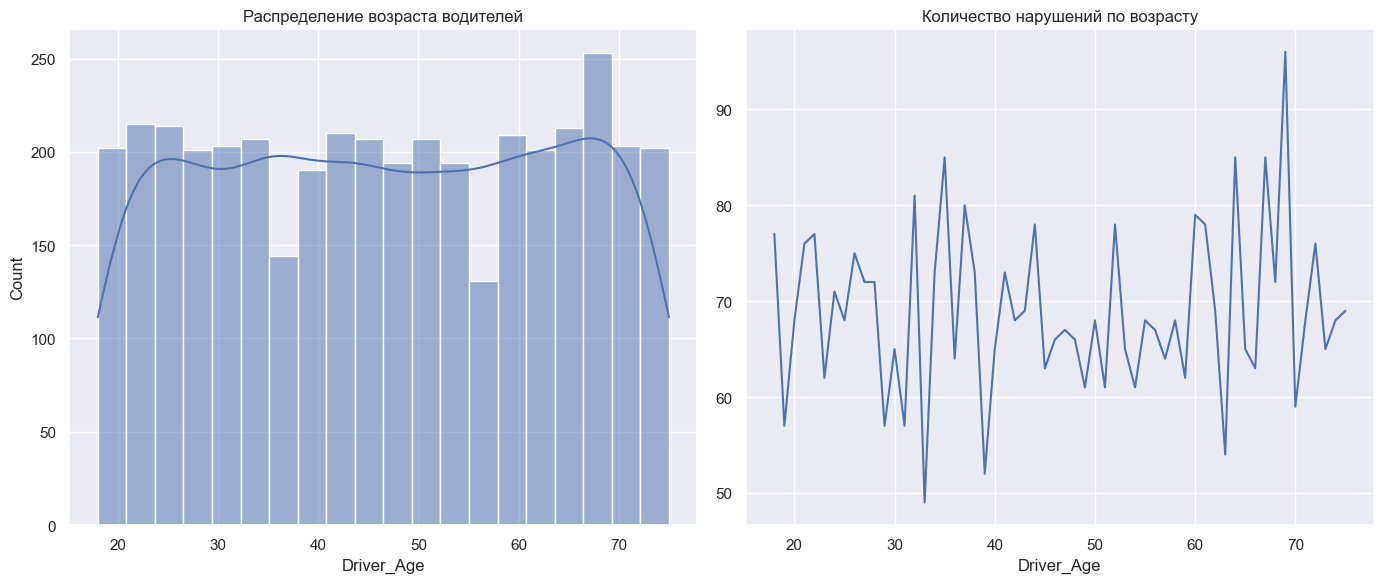

Вывод: Пик нарушений в возрасте 69 лет


In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='Driver_Age', bins=20, kde=True)
plt.title('Распределение возраста водителей')

plt.subplot(1, 2, 2)
age_violation = dataset.groupby('Driver_Age')['Violation_Type'].count()
sns.lineplot(x=age_violation.index, y=age_violation.values)
plt.title('Количество нарушений по возрасту')
plt.tight_layout()
plt.show()

print("Вывод: Пик нарушений в возрасте", age_violation.idxmax(), "лет")

3) Тип нарушений по возрасту водителей

<Figure size 1200x800 with 0 Axes>

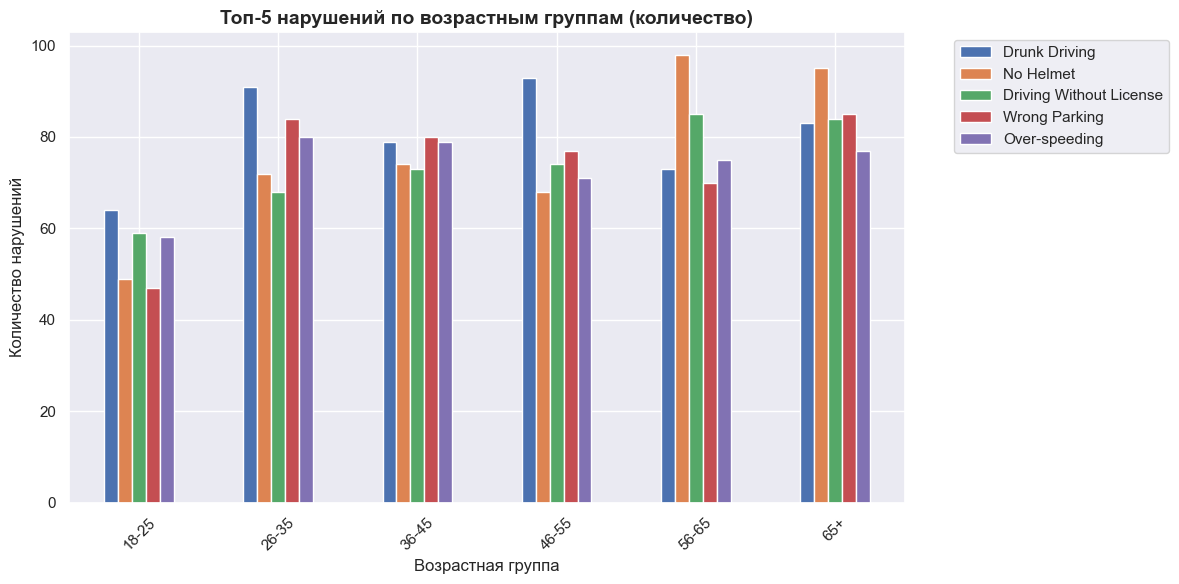

In [36]:
plt.figure(figsize=(12, 8))

age_groups = pd.cut(dataset['Driver_Age'], bins=[18, 25, 35, 45, 55, 65, 75], 
                    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

age_group_violation = pd.crosstab(age_groups, dataset['Violation_Type'])

top_violations = age_group_violation.sum().nlargest(5).index
age_group_violation[top_violations].plot(kind='bar', figsize=(12, 6))
plt.title('Топ-5 нарушений по возрастным группам (количество)', fontsize=14, fontweight='bold')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество нарушений')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Таким образом, более молодое поколение и часть опытных водителей (до 55 лет) склонны к вождению в нетрезвом виде. Оптыные водители в возрасе старше 55 лет пренебрегают использованием средств защиты (No Helmet).

Для определения целевой группы для каждого штата рассмотрим распределение нарушений по возрасту и географии.

C:\Users\arkot\AppData\Local\Temp\ipykernel_10128\2520499495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Age_Group'] = pd.cut(new_data['Driver_Age'],


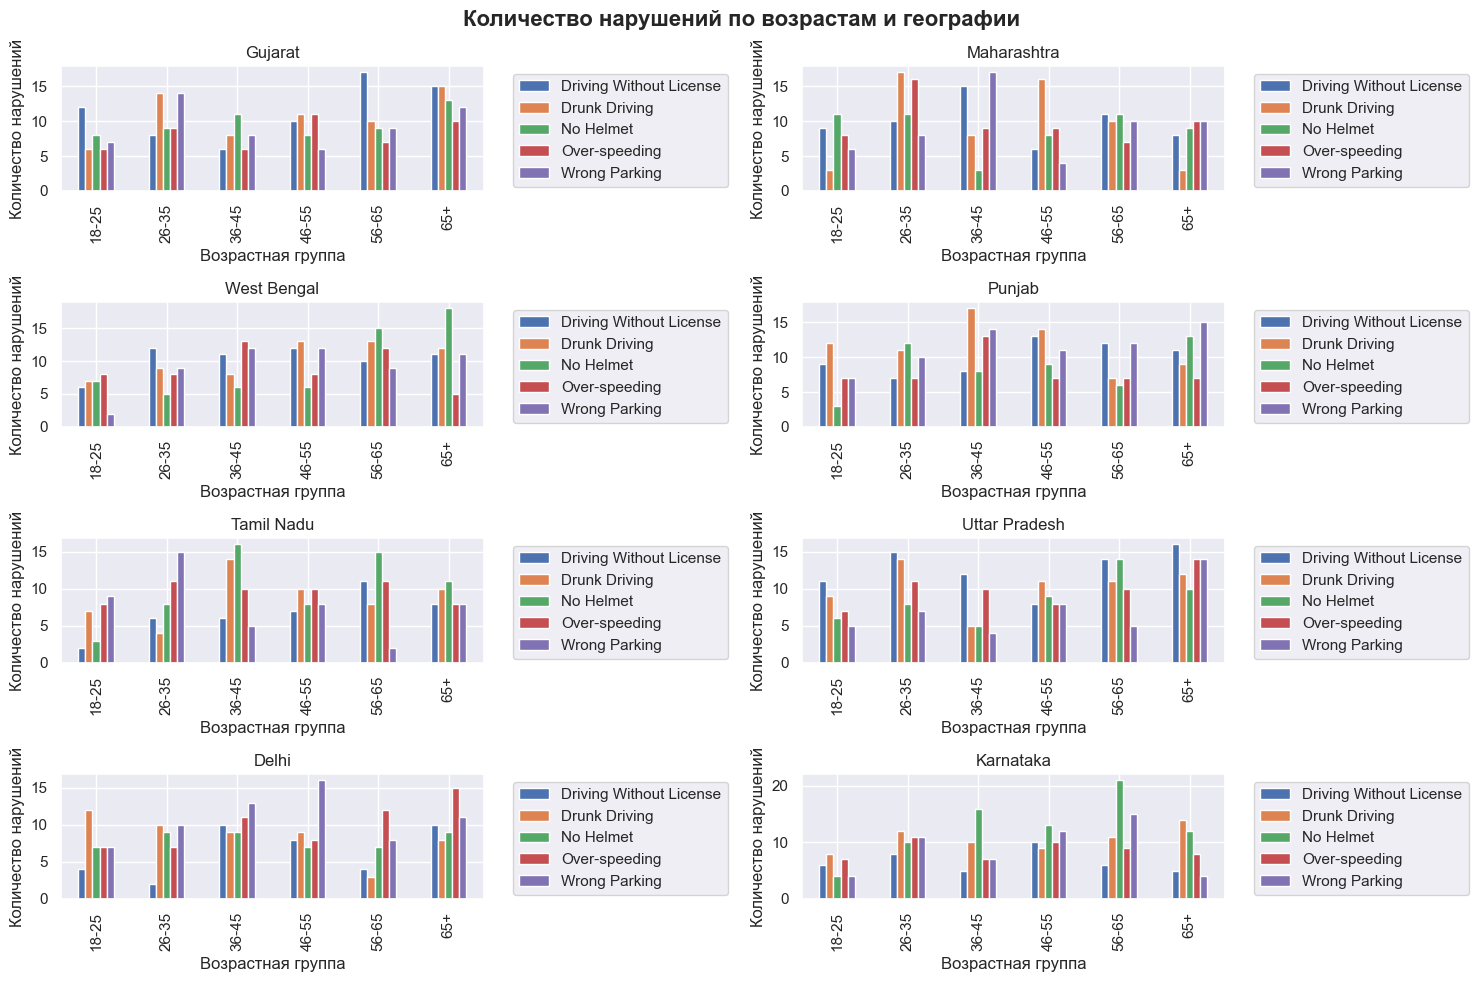

Вывод:

Gujarat:
  Возраст: 65+
  Частое нарушение: Driving Without License

Maharashtra:
  Возраст: 26-35
  Частое нарушение: Over-speeding

West Bengal:
  Возраст: 56-65
  Частое нарушение: Driving Without License

Punjab:
  Возраст: 36-45
  Частое нарушение: Drunk Driving

Tamil Nadu:
  Возраст: 36-45
  Частое нарушение: No Helmet

Uttar Pradesh:
  Возраст: 65+
  Частое нарушение: Driving Without License

Delhi:
  Возраст: 65+
  Частое нарушение: Wrong Parking

Karnataka:
  Возраст: 56-65
  Частое нарушение: No Helmet


In [59]:
top_locations = dataset['Location'].value_counts().head(8).index
top_violations = dataset['Violation_Type'].value_counts().head(5).index

new_data = dataset[
    (dataset['Location'].isin(top_locations)) & 
    (dataset['Violation_Type'].isin(top_violations))
]

# Создаем возрастные группы
new_data['Age_Group'] = pd.cut(new_data['Driver_Age'], 
                                   bins=[18, 25, 35, 45, 55, 65, 75], 
                                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Строим график
plt.figure(figsize=(15, 10))
for i, location in enumerate(top_locations, 1):
    plt.subplot(4, 2, i)
    location_data = new_data[new_data['Location'] == location]
    
    age_violation = pd.crosstab(location_data['Age_Group'], location_data['Violation_Type'])
    age_violation.plot(kind='bar', ax=plt.gca())
    plt.title(f'{location}')
    plt.xlabel('Возрастная группа')
    plt.ylabel('Количество нарушений')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Количество нарушений по возрастам и географии', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Вывод:")
for location in top_locations:
    location_data = new_data[new_data['Location'] == location]

    max_age = location_data['Age_Group'].value_counts().index[0]
    max_violation = location_data['Violation_Type'].value_counts().index[0]
    
    print(f"\n{location}:")
    print(f"  Возраст: {max_age}")
    print(f"  Частое нарушение: {max_violation}")

3. Зависимость количества повторных нарушений от возраста

<Figure size 1000x600 with 0 Axes>

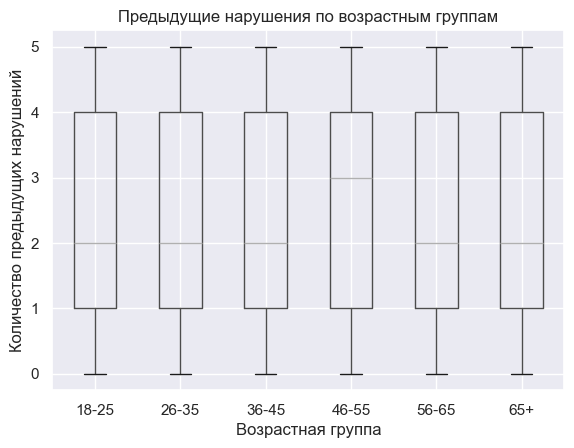

Вывод: Наибольшее количество повторных нарушений у возрастной группы 46-55


C:\Users\arkot\AppData\Local\Temp\ipykernel_10128\586284326.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"Вывод: Наибольшее количество повторных нарушений у возрастной группы {dataset.groupby('Age_Group')['Previous_Violations'].mean().idxmax()}")


In [58]:
dataset['Age_Group'] = pd.cut(dataset['Driver_Age'], 
                             bins=[18, 25, 35, 45, 55, 65, 75], 
                             labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

plt.figure(figsize=(10, 6))
dataset.boxplot(column='Previous_Violations', by='Age_Group')
plt.title('Предыдущие нарушения по возрастным группам')
plt.suptitle('')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество предыдущих нарушений')
plt.show()

print(f"Вывод: Наибольшее количество повторных нарушений у возрастной группы {dataset.groupby('Age_Group')['Previous_Violations'].mean().idxmax()}")

3) Влияние погоды на нарушения

<Figure size 1200x600 with 0 Axes>

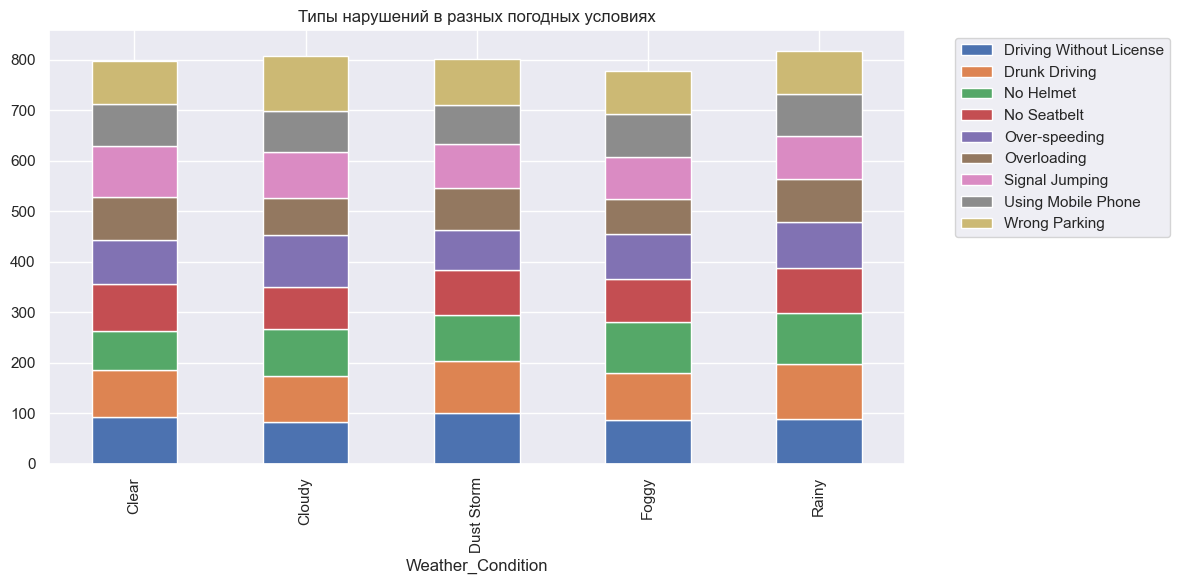

Вывод: Наибольшее количество нарушений в условиях: Rainy


In [ ]:
plt.figure(figsize=(12, 6))
weather_violation = pd.crosstab(dataset['Weather_Condition'], dataset['Violation_Type'])
weather_violation.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Типы нарушений в разных погодных условиях')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Наиболее опасная погода
most_dangerous_weather = weather_violation.sum(axis=1).idxmax()
print(f"Вывод: Наибольшее количество нарушений в условиях: {most_dangerous_weather}")

Результаты графика удивляют тем, что даже при отсутствии погодного влияния (Clear) все типы нарушений распределены практически равномерно и их количество практически эквивалентно кол-ву нарушений при плохих погодных условиях. То есть влияние погоды глобально отсутствует.

4) Временные закономерности

In [ ]:
# Добавляем временные признаки
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])
dataset['Hour'] = dataset['DateTime'].dt.hour
dataset['DayOfWeek'] = dataset['DateTime'].dt.day_name()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
hourly_violations = dataset['Hour'].value_counts().sort_index()
sns.lineplot(x=hourly_violations.index, y=hourly_violations.values)
plt.title('Нарушения по времени суток')
plt.xlabel('Час дня')

plt.subplot(1, 2, 2)
daily_violations = dataset['DayOfWeek'].value_counts()
sns.barplot(x=daily_violations.values, y=daily_violations.index)
plt.title('Нарушения по дням недели')
plt.tight_layout()
plt.show()

print(f"Вывод: Пик нарушений в {hourly_violations.idxmax()}:00, самый опасный день - {daily_violations.index[0]}")

NameError: name 'pd' is not defined

5) Типы транспортных средств и нарушения

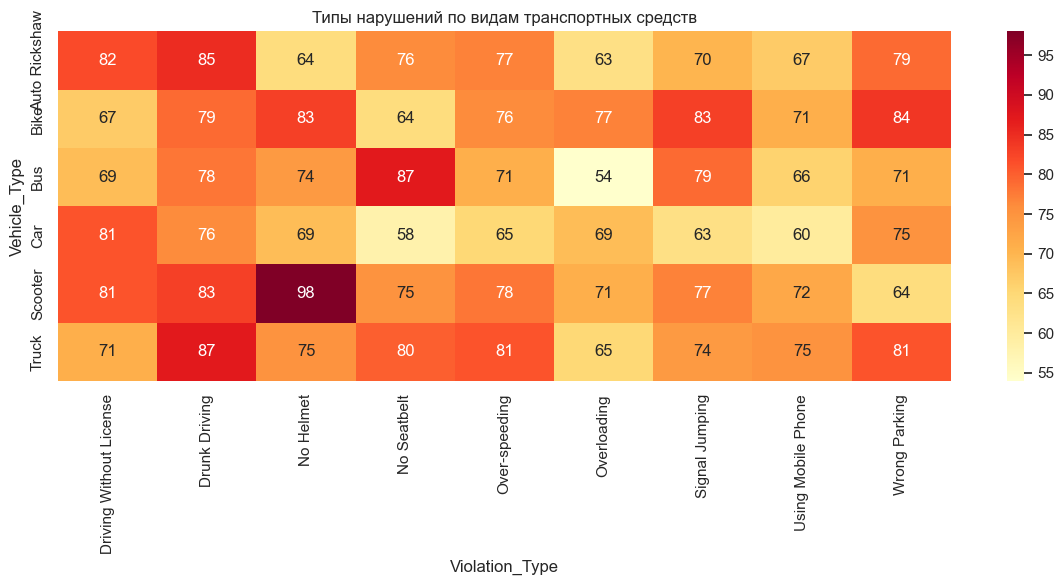

Вывод: Наиболее рискованный тип ТС: Scooter


In [ ]:
plt.figure(figsize=(12, 6))
vehicle_violation = pd.crosstab(dataset['Vehicle_Type'], dataset['Violation_Type'])
sns.heatmap(vehicle_violation, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Типы нарушений по видам транспортных средств')
plt.tight_layout()
plt.show()

most_risky_vehicle = vehicle_violation.sum(axis=1).idxmax()
print(f"Вывод: Наиболее рискованный тип ТС: {most_risky_vehicle}")

Из полученного графика видно, что одними из наиболее частых зафиксированных нарушений является отсутствие ношения шлема на траке, машине, автобусе, что само по себе не логично.

7) Алкоголь и серьезность нарушений

C:\Users\arkot\AppData\Local\Temp\ipykernel_17032\2732921661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_analysis = dataset.groupby('Breathalyzer_Result').agg({


<Figure size 1000x600 with 0 Axes>

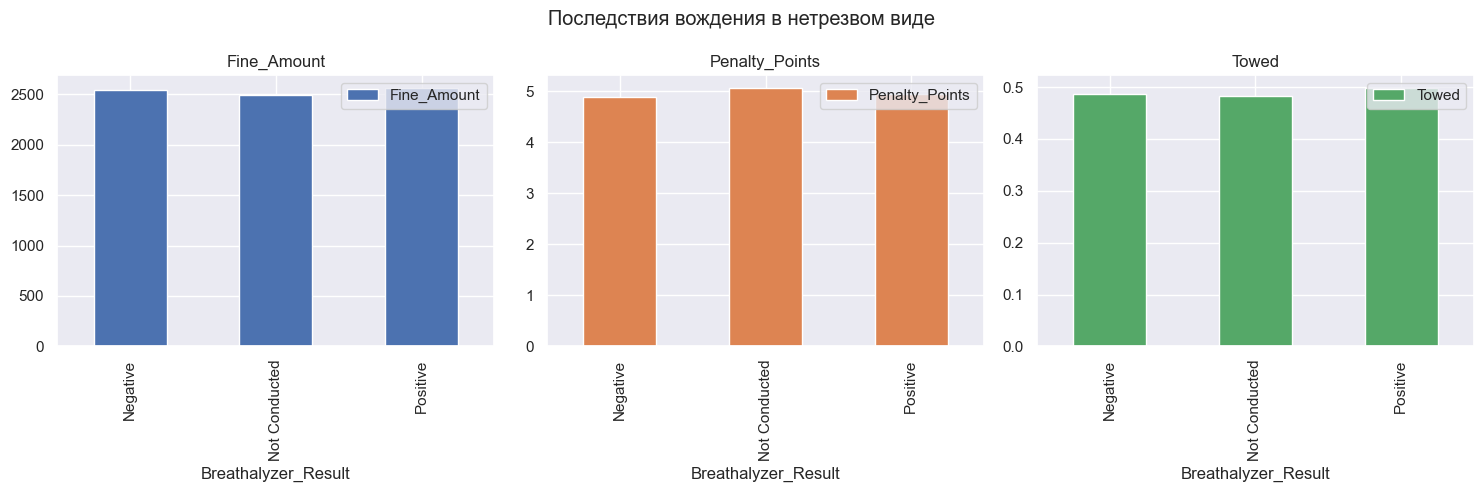

In [ ]:
plt.figure(figsize=(10, 6))
alcohol_analysis = dataset.groupby('Breathalyzer_Result').agg({
    'Fine_Amount': 'mean',
    'Penalty_Points': 'mean',
    'Towed': 'mean'
})
alcohol_analysis.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.suptitle('Последствия вождения в нетрезвом виде')
plt.tight_layout()
plt.show()

9. Корреляционный анализ числовых признаков

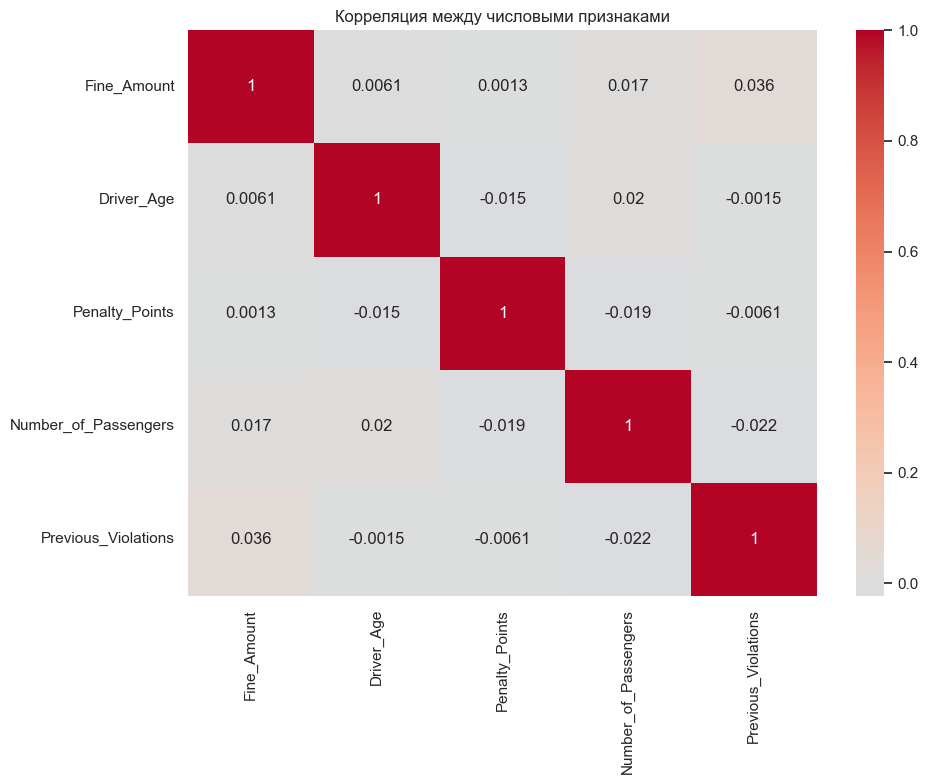

In [ ]:
numeric_cols = ['Fine_Amount', 'Driver_Age', 'Penalty_Points', 'Number_of_Passengers', 'Previous_Violations']
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между числовыми признаками')
plt.tight_layout()
plt.show()

Корреляция и зависимости между признаками отсутствуют, значит, они не связаны и не влияют друг на друга.

<Figure size 1000x600 with 0 Axes>

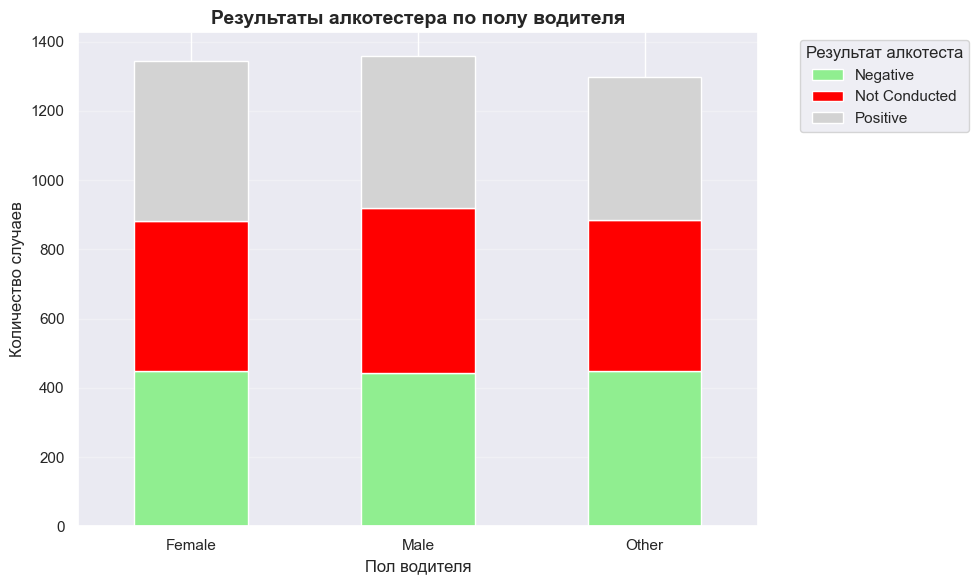

In [ ]:
# График распределения результатов алкотестера по полу водителя
plt.figure(figsize=(10, 6))

# Создаем cross-tabulation
gender_breathalyzer = pd.crosstab(dataset['Driver_Gender'], dataset['Breathalyzer_Result'])

# Строим stacked bar plot
gender_breathalyzer.plot(kind='bar', stacked=True, figsize=(10, 6), 
                        color=['lightgreen', 'red', 'lightgray'])
plt.title('Результаты алкотестера по полу водителя', fontsize=14, fontweight='bold')
plt.xlabel('Пол водителя')
plt.ylabel('Количество случаев')
plt.legend(title='Результат алкотеста', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()